In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
# import dataset
iris = datasets.load_iris()

In [7]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [9]:
IsSetosa = (iris.target==0)
print('Portion of Setosa: ', IsSetosa.sum()/len(IsSetosa))

Portion of Setosa:  0.3333333333333333


In [13]:
# convert imported data into pandas dataframe
df = pd.DataFrame(iris.data)

# assign feature names to dataframe
df.columns = iris.feature_names

# add target labels to dataframe
df['target'] = IsSetosa
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


In [15]:
# split data into training and testing set
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of training dataset: ', train.shape)
print('Size of testing dataset: ', test.shape)

Size of training dataset:  (135, 5)
Size of testing dataset:  (15, 5)


In [17]:
# let x in training set be variables without target
# let y in training set be target
x_train = train.iloc[:, :2]
y_train = train['target']

# let x in testing set be variables without target
# let y in testing set be target
x_test = test.iloc[:, :2]
y_test = test['target']

/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


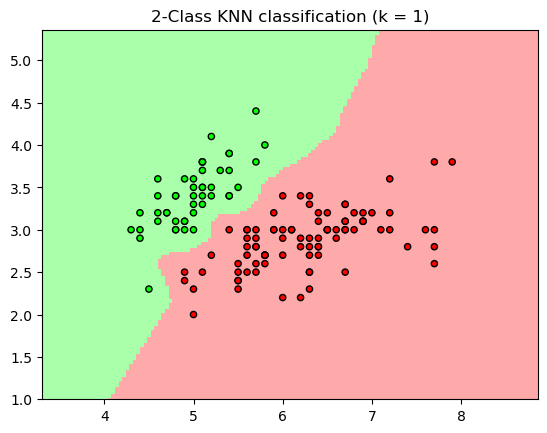

Prediction Accuracy: 1.000000


/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


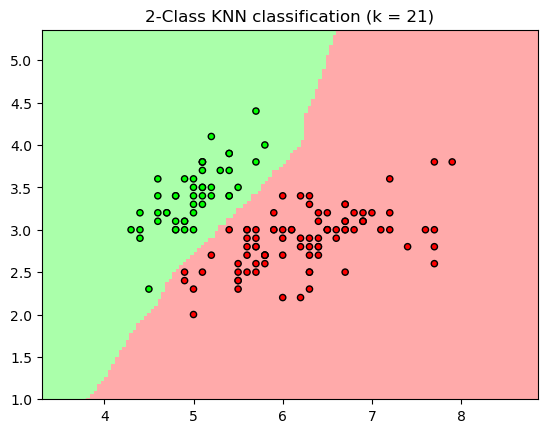

Prediction Accuracy: 1.000000


/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


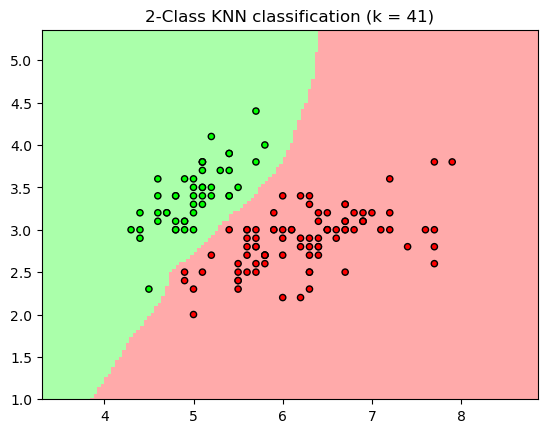

Prediction Accuracy: 1.000000


/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


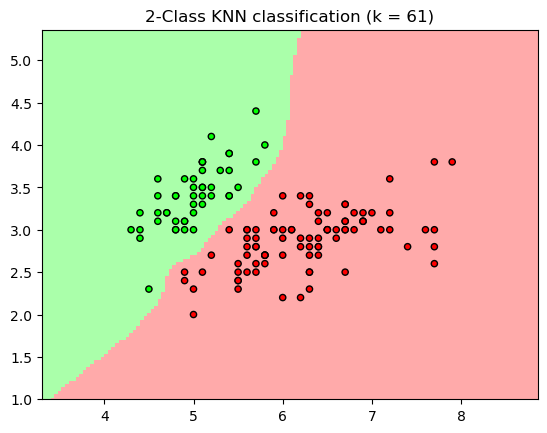

Prediction Accuracy: 1.000000


/opt/anaconda3/envs/p3workshop/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


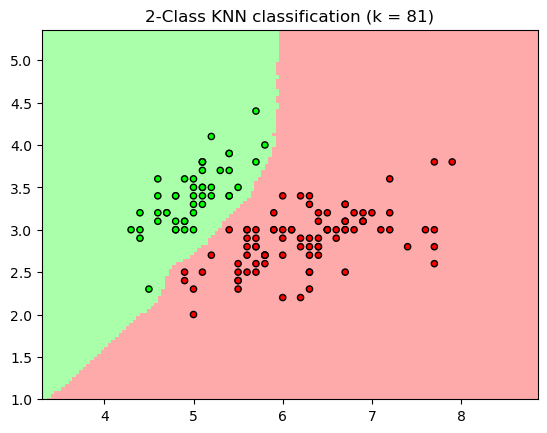

Prediction Accuracy: 1.000000


In [19]:
# fit KNN model
# use for loop to iterate the number of neighbors k from 1, 21, 41, ..., 81
for k in range(1, 100, 20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(x_train, y_train)

    h = 0.04
    # create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    # plot decision boundary
    # assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max]
    x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
    y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # plot training points
    plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('2-Class KNN classification (k = %i)'%k)
    plt.show()
    y_pred = knn.predict(x_test)
    print('Prediction Accuracy: %f'%accuracy_score(y_pred, y_test))

